In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/arjun0200/Datasets/main/Flightprice.csv")
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

### Data Analysis

In [3]:
df.head() # checking first 5 rows

,Price,Flight_Name,Arrival_Location,Destination_Location,Arrival_time,Destination_time,No of Stops,Duration,DateDay
0,₹9419,Spice Jet,DEL,BLR,20:00,22:30,Non Stop,NaN,"20 Jul, Wed"
1,₹9419,Go Air,DEL,BLR,20:30,23:25,Non Stop,02h 55m,"20 Jul, Wed"
2,₹9419,Air Asia,DEL,BLR,08:10,10:40,Non Stop,02h 30m,"20 Jul, Wed"
3,₹9419,Spice Jet,DEL,BLR,06:05,08:55,Non Stop,02h 50m,"20 Jul, Wed"
4,₹9945,Air Asia,DEL,BLR,09:35,12:25,Non Stop,02h 50m,"20 Jul, Wed"


In [4]:
print(df.shape) # checking size of the dataset

(1949, 9)


### Checking columns

In [5]:
df.columns

Index(['Price', 'Flight_Name', 'Arrival_Location', 'Destination_Location',
       'Arrival_time', 'Destination_time', 'No of Stops', 'Duration',
       'DateDay'],
      dtype='object')

### Dataframe Description:

- Price : Actual traveling cost of the flight

- Flight_Name : Flight names

- Arrival_Location : Arrival Location

- Destination_Location : Destination Location
    
- Arrival_time : Takeoff timing of the flight.
    
- Destination_time : Reahout timing of the flight to their destination.
    
- No of Stops : No of stops is the flight interval stops.
    
- Duration : Total time taken to reach out destination place.
    
- DateDay : Represent date and day of the flight.

In [6]:
df.dtypes  # checking datatypes

Price                   object
Flight_Name             object
Arrival_Location        object
Destination_Location    object
Arrival_time            object
Destination_time        object
No of Stops             object
Duration                object
DateDay                 object
dtype: object

### Checking Null values of the dataset

In [7]:
df.isnull().sum()/len(df) # checking null values percentage of dataset

Price                   0.000000
Flight_Name             0.000000
Arrival_Location        0.000000
Destination_Location    0.000000
Arrival_time            0.000000
Destination_time        0.000000
No of Stops             0.000000
Duration                0.003079
DateDay                 0.000000
dtype: float64

In [8]:
df.describe()  # checking overall summary of the dataset

,Price,Flight_Name,Arrival_Location,Destination_Location,Arrival_time,Destination_time,No of Stops,Duration,DateDay
count,1949,1949,1949,1949,1949,1949,1949,1943,1949
unique,226,6,1,1,122,89,3,240,7
top,₹9419,Vistara,DEL,BLR,21:20,07:50,1 Stop,02h 45m,"24 Jul, Sun"
freq,399,1048,1949,1949,66,140,1252,75,291


## Feature Engineering

In [9]:
df.head()

,Price,Flight_Name,Arrival_Location,Destination_Location,Arrival_time,Destination_time,No of Stops,Duration,DateDay
0,₹9419,Spice Jet,DEL,BLR,20:00,22:30,Non Stop,NaN,"20 Jul, Wed"
1,₹9419,Go Air,DEL,BLR,20:30,23:25,Non Stop,02h 55m,"20 Jul, Wed"
2,₹9419,Air Asia,DEL,BLR,08:10,10:40,Non Stop,02h 30m,"20 Jul, Wed"
3,₹9419,Spice Jet,DEL,BLR,06:05,08:55,Non Stop,02h 50m,"20 Jul, Wed"
4,₹9945,Air Asia,DEL,BLR,09:35,12:25,Non Stop,02h 50m,"20 Jul, Wed"


### Removing Special character from Price

In [10]:
Price_final = []
for i in df['Price']:
    Price_final.append(i.replace("₹",""))

In [11]:
df['Price_final'] = Price_final
df['Price_final'] = df['Price_final'].astype('float')  # converting price into float type

In [12]:
df.head(1)

,Price,Flight_Name,Arrival_Location,Destination_Location,Arrival_time,Destination_time,No of Stops,Duration,DateDay,Price_final
0,₹9419,Spice Jet,DEL,BLR,20:00,22:30,Non Stop,NaN,"20 Jul, Wed",9419.0


In [13]:
# Droping Price as we extracted important details from the dataset.
df.drop('Price', axis = 1, inplace = True)

### Extractiong Arrival_time import data

In [14]:
df["Arrival_time_hour"] = pd.to_datetime(df["Arrival_time"]).dt.hour
df["Arrival_time_min"] = pd.to_datetime(df["Arrival_time"]).dt.minute

### Extracting Destination_time Important data

In [15]:
df["Destination_time_hour"] = pd.to_datetime(df["Destination_time"]).dt.hour
df["Destination_time_min"] = pd.to_datetime(df["Destination_time"]).dt.minute

In [16]:
# Droping DateDay as we extracted important details from the dataset.
df.drop(['Arrival_time','Destination_time'], axis = 1, inplace = True)
df.head(1)

,Flight_Name,Arrival_Location,Destination_Location,No of Stops,Duration,DateDay,Price_final,Arrival_time_hour,Arrival_time_min,Destination_time_hour,Destination_time_min
0,Spice Jet,DEL,BLR,Non Stop,NaN,"20 Jul, Wed",9419.0,20,0,22,30


In [17]:
df.head(1)

,Flight_Name,Arrival_Location,Destination_Location,No of Stops,Duration,DateDay,Price_final,Arrival_time_hour,Arrival_time_min,Destination_time_hour,Destination_time_min
0,Spice Jet,DEL,BLR,Non Stop,NaN,"20 Jul, Wed",9419.0,20,0,22,30


### From above information we find that Duration having some of null values hence we need to fix it.

In [18]:
df['Calc_Duration'] = (df['Destination_time_hour']*60 + df['Destination_time_min']) - (df['Arrival_time_hour']*60 + df['Arrival_time_min']) 

In [19]:
# Droping Duration as we extracted important details from the dataset.
df.drop('Duration', axis = 1, inplace = True)

In [20]:
df.sample(10)

,Flight_Name,Arrival_Location,Destination_Location,No of Stops,DateDay,Price_final,Arrival_time_hour,Arrival_time_min,Destination_time_hour,Destination_time_min,Calc_Duration
1344,Vistara,DEL,BLR,1 Stop,"24 Jul, Sun",18135.0,14,45,19,30,285
1045,Air India,DEL,BLR,2 Stop,"23 Jul, Sat",17647.0,10,15,18,20,485
259,Vistara,DEL,BLR,1 Stop,"20 Jul, Wed",19708.0,17,10,18,15,65
898,Air India,DEL,BLR,2 Stop,"23 Jul, Sat",12738.0,17,55,11,10,-405
391,Air India,DEL,BLR,2 Stop,"21 Jul, Thu",12738.0,17,55,7,50,-605
244,Vistara,DEL,BLR,2 Stop,"20 Jul, Wed",18877.0,6,15,17,45,690
275,Vistara,DEL,BLR,1 Stop,"20 Jul, Wed",28843.0,9,50,16,20,390
805,Vistara,DEL,BLR,1 Stop,"22 Jul, Fri",21495.0,7,20,19,30,730
1207,Vistara,DEL,BLR,1 Stop,"24 Jul, Sun",13834.0,15,30,7,50,-460
1504,Air India,DEL,BLR,1 Stop,"25 Jul, Mon",12675.0,14,30,11,10,-200


In [21]:
# As we find that some of value are getting negative hence we need to fix it with adding a whole day minutes.
Durations = []
for i in df['Calc_Duration']:
    if i<0:
        Durations.append(i+1440)
    else:
        Durations.append(i)
        
# Droping Duration as we extracted important details from the dataset.
df.drop('Calc_Duration', axis = 1, inplace = True)

In [22]:
df['Durations'] = Durations
df.head(5)

,Flight_Name,Arrival_Location,Destination_Location,No of Stops,DateDay,Price_final,Arrival_time_hour,Arrival_time_min,Destination_time_hour,Destination_time_min,Durations
0,Spice Jet,DEL,BLR,Non Stop,"20 Jul, Wed",9419.0,20,0,22,30,150
1,Go Air,DEL,BLR,Non Stop,"20 Jul, Wed",9419.0,20,30,23,25,175
2,Air Asia,DEL,BLR,Non Stop,"20 Jul, Wed",9419.0,8,10,10,40,150
3,Spice Jet,DEL,BLR,Non Stop,"20 Jul, Wed",9419.0,6,5,8,55,170
4,Air Asia,DEL,BLR,Non Stop,"20 Jul, Wed",9945.0,9,35,12,25,170


### Fixing DateDay column dataset

In [23]:
df[['Date','Day']] = df.DateDay.str.split(",",expand=True)
df.head(1)

,Flight_Name,Arrival_Location,Destination_Location,No of Stops,DateDay,Price_final,Arrival_time_hour,Arrival_time_min,Destination_time_hour,Destination_time_min,Durations,Date,Day
0,Spice Jet,DEL,BLR,Non Stop,"20 Jul, Wed",9419.0,20,0,22,30,150,20 Jul,Wed


In [24]:
# Droping DateDay as we extracted important details from the dataset.
df.drop('DateDay', axis = 1, inplace = True)
df.head(1)

,Flight_Name,Arrival_Location,Destination_Location,No of Stops,Price_final,Arrival_time_hour,Arrival_time_min,Destination_time_hour,Destination_time_min,Durations,Date,Day
0,Spice Jet,DEL,BLR,Non Stop,9419.0,20,0,22,30,150,20 Jul,Wed


In [25]:
df[['Flight_Date','Month']] = df.Date.str.split(" ",expand=True)

# Droping DateDay as we extracted important details from the dataset.
df.drop('Date', axis = 1, inplace = True)

df.head(1)

,Flight_Name,Arrival_Location,Destination_Location,No of Stops,Price_final,Arrival_time_hour,Arrival_time_min,Destination_time_hour,Destination_time_min,Durations,Day,Flight_Date,Month
0,Spice Jet,DEL,BLR,Non Stop,9419.0,20,0,22,30,150,Wed,20,Jul


In [26]:
df.dtypes

Flight_Name               object
Arrival_Location          object
Destination_Location      object
No of Stops               object
Price_final              float64
Arrival_time_hour          int64
Arrival_time_min           int64
Destination_time_hour      int64
Destination_time_min       int64
Durations                  int64
Day                       object
Flight_Date               object
Month                     object
dtype: object

In [27]:
for i in df.columns:
    print(i, "column having ", df[i].nunique(), "unique values", "\n")  # train dataset

Flight_Name column having  6 unique values 

Arrival_Location column having  1 unique values 

Destination_Location column having  1 unique values 

No of Stops column having  3 unique values 

Price_final column having  226 unique values 

Arrival_time_hour column having  20 unique values 

Arrival_time_min column having  12 unique values 

Destination_time_hour column having  22 unique values 

Destination_time_min column having  12 unique values 

Durations column having  195 unique values 

Day column having  7 unique values 

Flight_Date column having  7 unique values 

Month column having  1 unique values 



In [28]:
for i in df.select_dtypes(include = 'object').columns:
    print("--------------"+i+"---------------------",'\n' ,df[i].value_counts(), "\n")  # checking unique counts

--------------Flight_Name--------------------- 
 Vistara       1048
Indigo Air     299
Air India      263
Go Air         155
Air Asia        98
Spice Jet       86
Name: Flight_Name, dtype: int64 

--------------Arrival_Location--------------------- 
 DEL    1949
Name: Arrival_Location, dtype: int64 

--------------Destination_Location--------------------- 
 BLR    1949
Name: Destination_Location, dtype: int64 

--------------No of Stops--------------------- 
 1 Stop      1252
2 Stop       460
Non Stop     237
Name: No of Stops, dtype: int64 

--------------Day--------------------- 
  Sun    291
 Mon    284
 Wed    279
 Sat    279
 Tue    278
 Fri    275
 Thu    263
Name: Day, dtype: int64 

--------------Flight_Date--------------------- 
 24    291
25    284
20    279
23    279
26    278
22    275
21    263
Name: Flight_Date, dtype: int64 

--------------Month--------------------- 
 Jul    1949
Name: Month, dtype: int64 



## Exploratory Data Analysis

In [29]:
print("Before dropping duplicates, size of df is",len(df))

df.drop_duplicates(keep = 'first', inplace = True)   # dropping duplicate values for improved dataset 

print("After dropping duplicates, size of df is",len(df))


Before dropping duplicates, size of df is 1949
After dropping duplicates, size of df is 1875


### Checking for Null values`

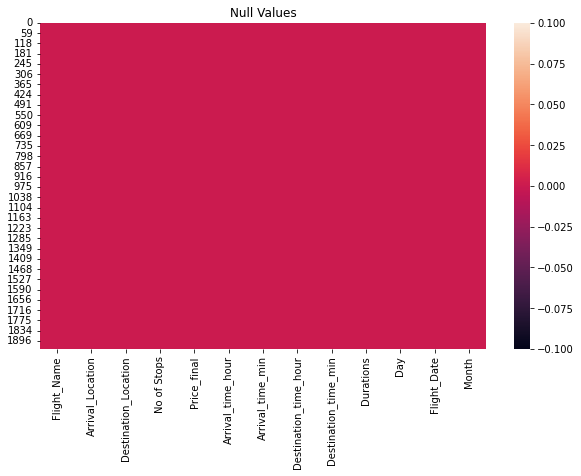

In [30]:
plt.figure(figsize=[10,6])
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()


<AxesSubplot:>

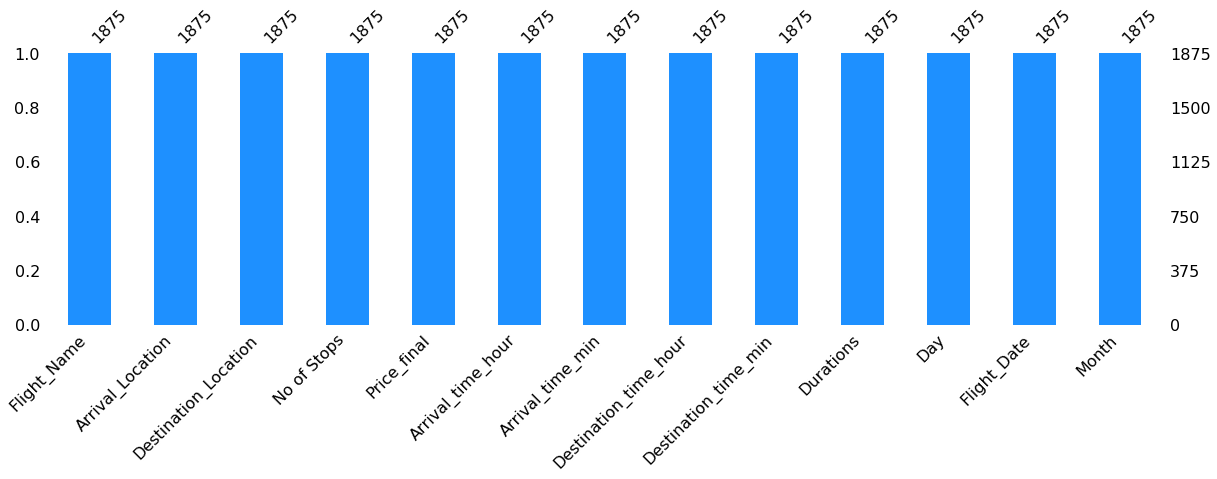

In [31]:
import missingno
missingno.bar(df, figsize = (20,5), color="dodgerblue")

### Dividing columns into object and numerical categories for easy visualization understandings

In [32]:
df_object = df.select_dtypes(include = 'object').columns  # object dataset columns
df_num = df.select_dtypes(exclude = 'object').columns  # numerical dataset columns

In [33]:
df_object  # checking object columns

Index(['Flight_Name', 'Arrival_Location', 'Destination_Location',
       'No of Stops', 'Day', 'Flight_Date', 'Month'],
      dtype='object')

In [34]:
df_num  # checking non object columns

Index(['Price_final', 'Arrival_time_hour', 'Arrival_time_min',
       'Destination_time_hour', 'Destination_time_min', 'Durations'],
      dtype='object')

## Visualization

<AxesSubplot:xlabel='Flight_Name', ylabel='Price_final'>

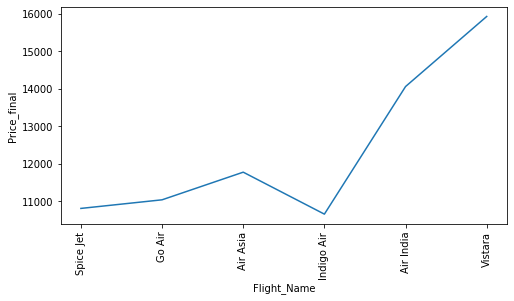

In [35]:
plt.figure(figsize=(8,4))
plt.xticks(rotation = 90)
sns.lineplot(x='Flight_Name', y='Price_final', data=df, ci=None)
#plt.xticks(rotation = 90)

#### Observations: - 
- From above graph we can find that Air Asia, Air India and Vistara having high price value flight while rest flights having lower cost.

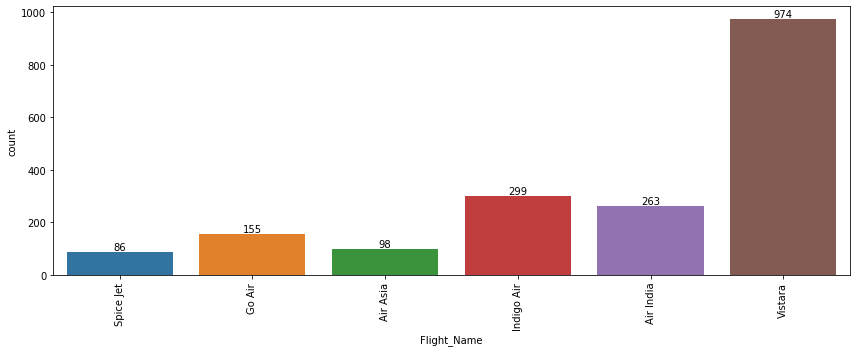

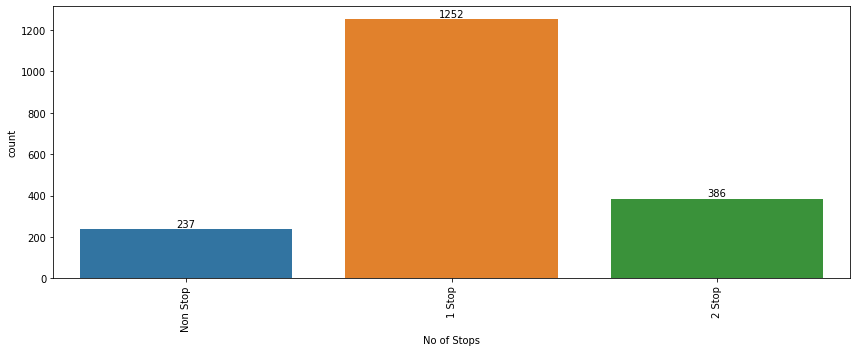

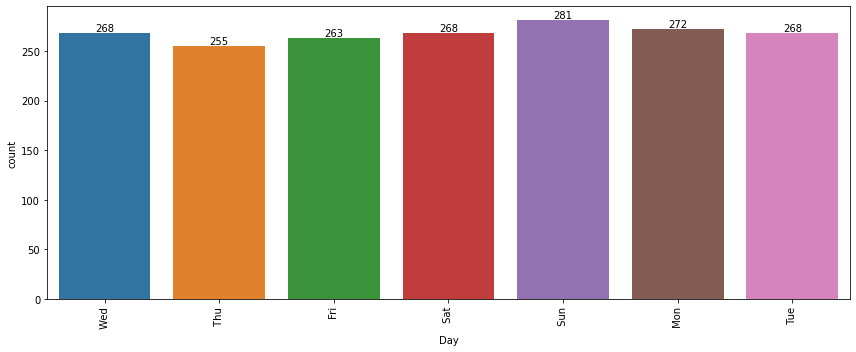

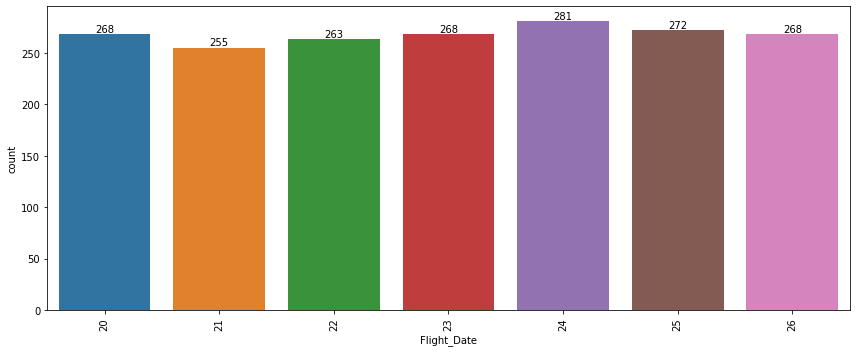

In [36]:
def countplot(x):
    df_counts = df[x].value_counts()
    plt.figure(figsize=(12,5))
    df_viz = sns.countplot(x = x, data = df)
    plt.xticks(rotation=90)
    plt.tight_layout()
    for j in df_viz.containers:
        df_viz.bar_label(j)


for i in ['Flight_Name','No of Stops', 'Day', 'Flight_Date']:
    countplot(i)

### Price Variation with different characteristics

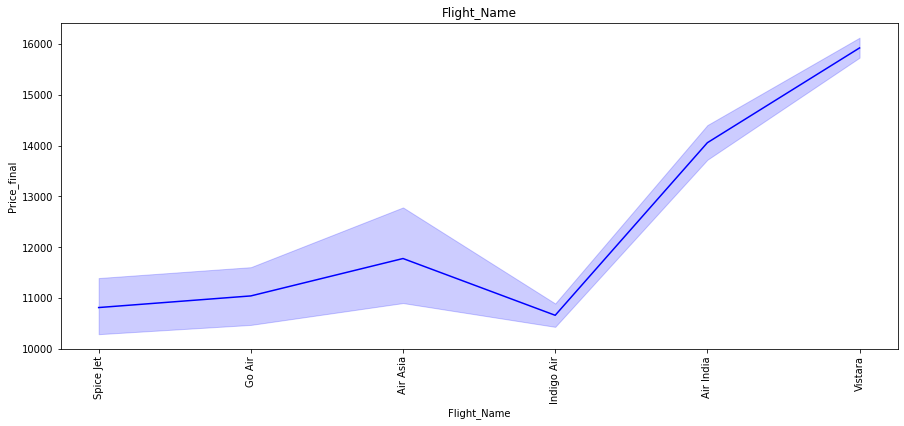

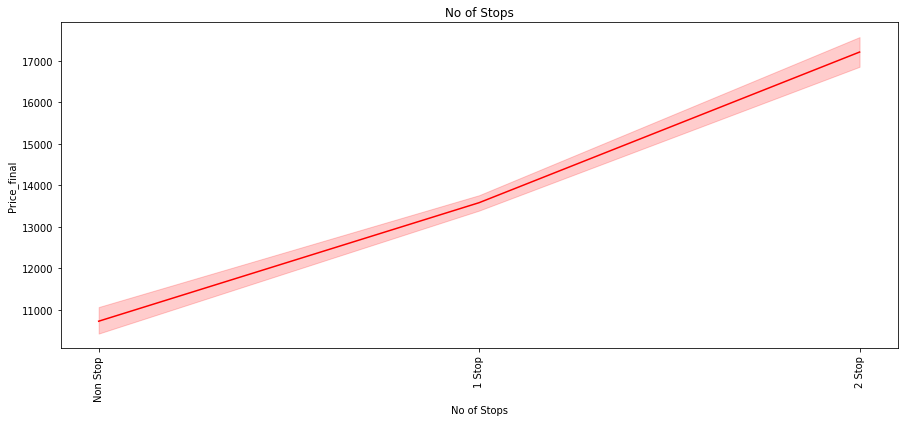

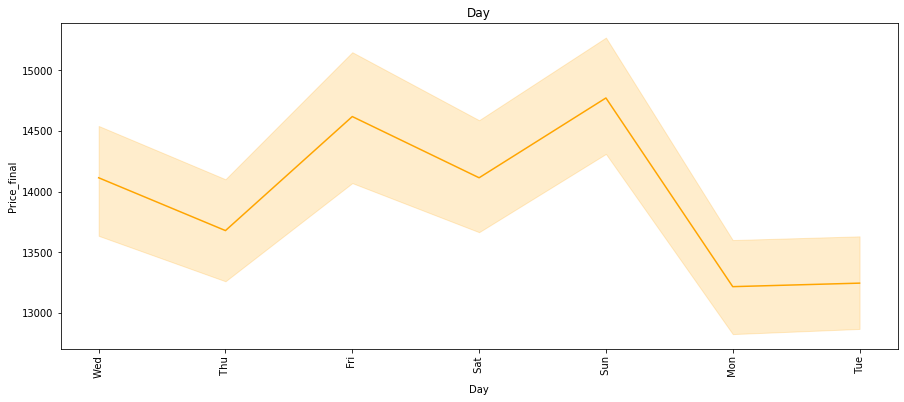

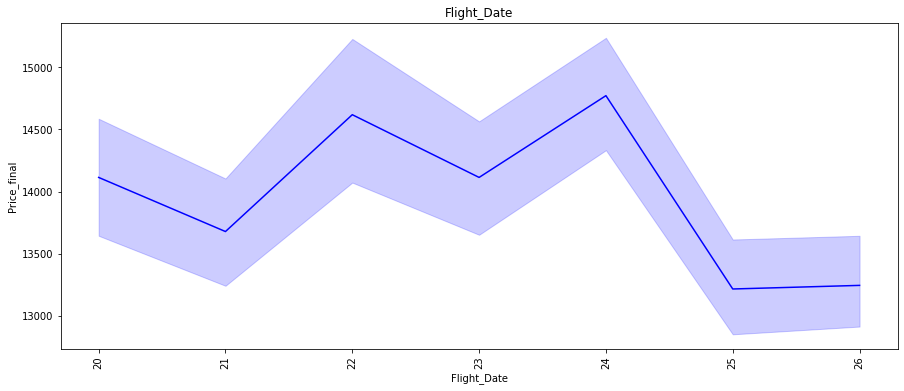

In [37]:
j = ['blue', 'red', 'orange', 'blue']
for i,j in zip(['Flight_Name','No of Stops', 'Day', 'Flight_Date'], j):
    plt.figure(figsize=(15,6))
    sns.lineplot(x= i ,y = 'Price_final' ,data=df, color = j)
    plt.xticks(rotation = 90)
    plt.title(i)
    plt.show()

### Checking Price Variation

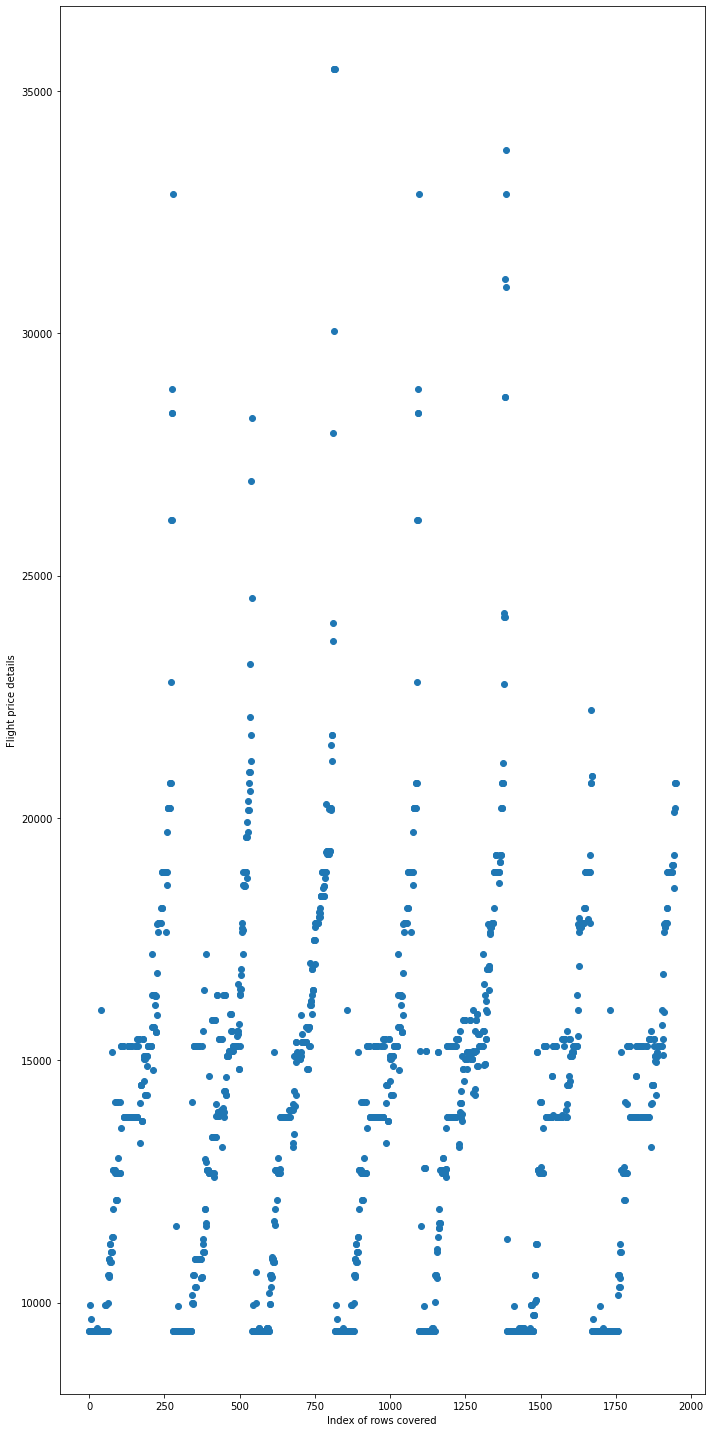

In [38]:
plt.style.use('fast')
plt.figure(figsize=(10,20))
plt.scatter(df.index, df['Price_final'])
plt.xlabel("Index of rows covered")
plt.ylabel("Flight price details")
plt.tight_layout()
plt.show()


#### In the above scatter plot we are able to see that most of the flight price values are accumulated between 10000 and 20000 and very rare data points are distributed above that number.

### Price variation according to travel hours

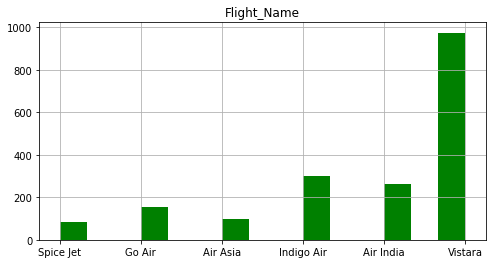

<AxesSubplot:xlabel='Arrival_time_hour', ylabel='Price_final'>

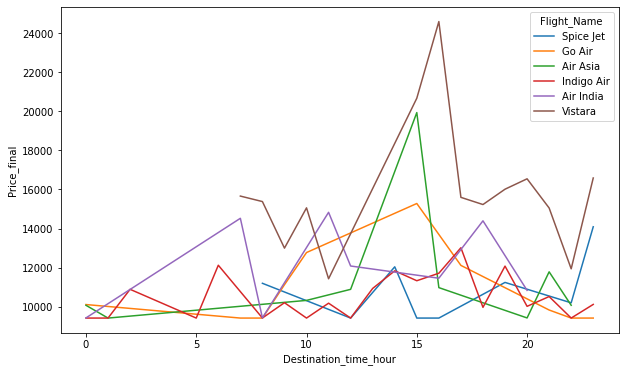

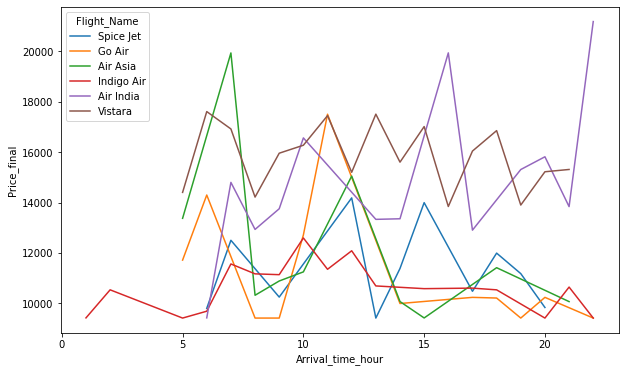

In [39]:

#Airline
df['Flight_Name'].hist(figsize=(8,4),bins = 15,color='g')
plt.title("Flight_Name")
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(x='Destination_time_hour', y='Price_final', hue='Flight_Name', data=df, ci = None)

plt.figure(figsize=(10,6))
sns.lineplot(x='Arrival_time_hour', y='Price_final', hue='Flight_Name', data=df, ci = None)

In [40]:
#a=["Vistara"]
filterinfDataframe = df[(df['Flight_Name'].isin(["Go AIr"])) & (df['Flight_Name'].isin(['Vistara'])) ]
filterinfDataframe


# plt.figure(figsize=(10,6))
# sns.lineplot(x='Flight_Date', y='Price_final', hue='Flight_Name', data=filterinfDataframe, ci=None)

,Flight_Name,Arrival_Location,Destination_Location,No of Stops,Price_final,Arrival_time_hour,Arrival_time_min,Destination_time_hour,Destination_time_min,Durations,Day,Flight_Date,Month


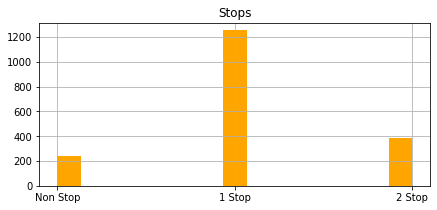

<AxesSubplot:xlabel='No of Stops', ylabel='Price_final'>

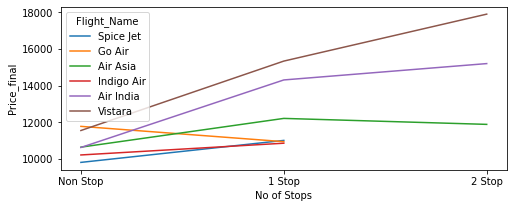

In [41]:
#Total_Stops
df['No of Stops'].hist(figsize=(7,3),bins = 15,color='orange')
plt.title("Stops")
plt.show()

plt.figure(figsize=(8,3))
sns.lineplot(x='No of Stops', y='Price_final', hue='Flight_Name', data=df, ci=None)

Observations: 
   - Go Air, Spice Jet and Indigo Air are not stop upto 1 only as per data while rest of flight are stop upto 2. 

### Price variation according to No of Stops

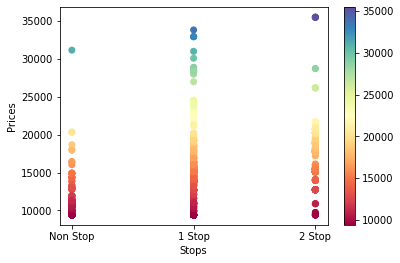

In [42]:
plt.scatter(x = df['No of Stops'], y = df['Price_final'], c= df['Price_final'], cmap='Spectral')
plt.colorbar()
plt.xlabel('Stops')
plt.ylabel('Prices')
plt.show()


#### As per above graph we find that flight with more than 1 stop having hight cost.

### Arrival and Destination Location

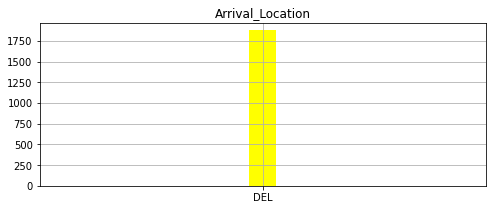

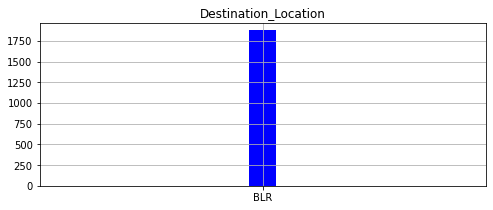

In [43]:
#Arrival
df['Arrival_Location'].hist(figsize=(8,3),bins = 15,color='yellow')
plt.title("Arrival_Location")
plt.show()

#Destination
df['Destination_Location'].hist(figsize=(8,3),bins = 15,color='blue')
plt.title("Destination_Location")
plt.show()

#### We have checked price for two location Delhi to Bangalore

### Checking Overall of the Dataset by Pairplot

<Figure size 1080x1080 with 0 Axes>

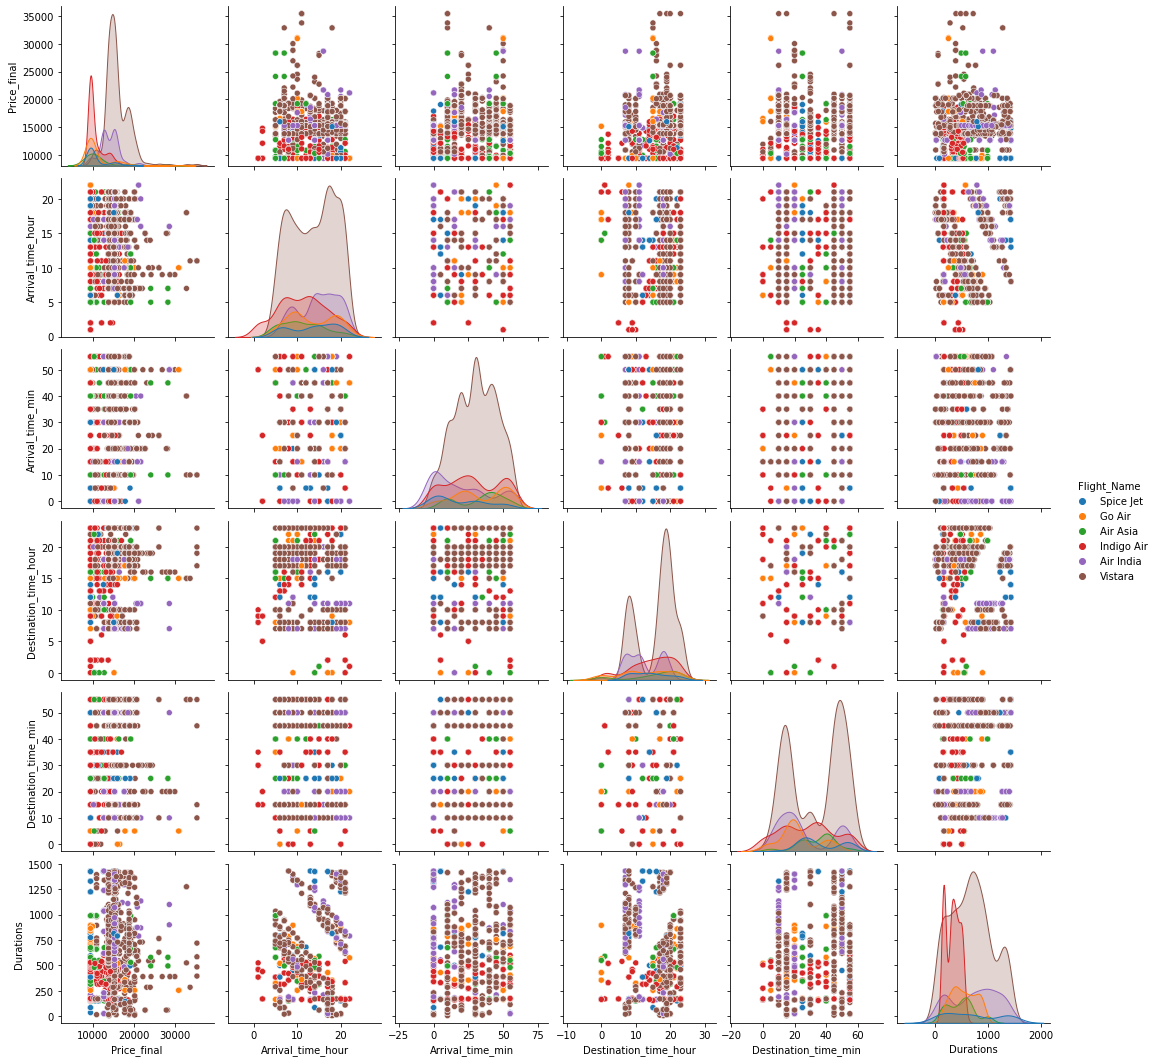

In [44]:
plt.figure(figsize = (15,15))
sns.pairplot(df, hue = 'Flight_Name') 

### Converting objects dataset into numerical form we are using Ordinal Encoder

In [45]:
from sklearn.preprocessing import OrdinalEncoder
onc = OrdinalEncoder()

In [46]:
for i in df.select_dtypes(include = 'object').columns:
    df[i] = onc.fit_transform(df[i].values.reshape(-1,1))
     

In [47]:
df.head(1) # checking result

,Flight_Name,Arrival_Location,Destination_Location,No of Stops,Price_final,Arrival_time_hour,Arrival_time_min,Destination_time_hour,Destination_time_min,Durations,Day,Flight_Date,Month
0,4.0,0.0,0.0,2.0,9419.0,20,0,22,30,150,6.0,0.0,0.0


### Dealing with Outliers

If it was present, we could have used in the particular features

1. Zscore
2. Using percentile/quantile

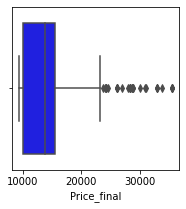

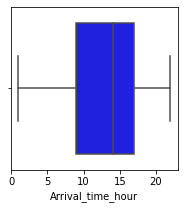

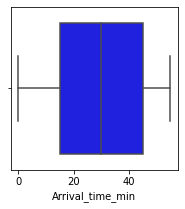

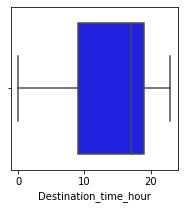

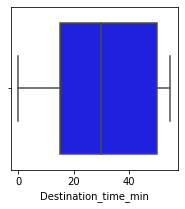

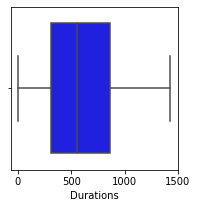

In [48]:
#checking for outliers
for i in df_num:
    plt.figure(figsize = (3,3))
    sns.boxplot(df[i], orient='v', color='blue')

From above observation we find that Price final having some outliers.

### Density Plot

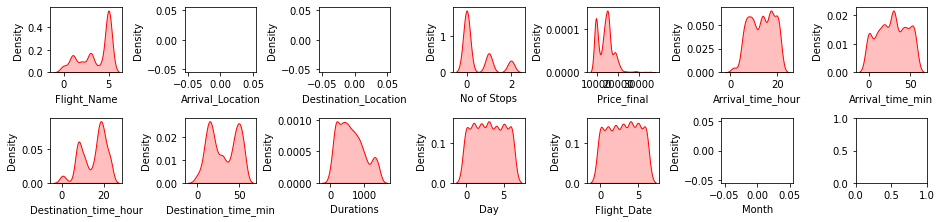

In [49]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(13,3))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

<AxesSubplot:>

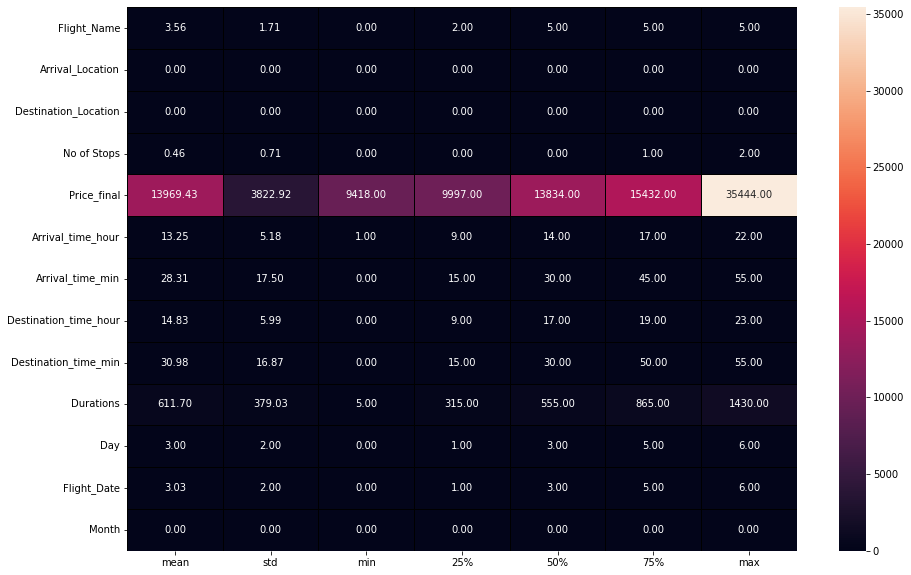

In [50]:
plt.figure(figsize = (15,10))
sns.heatmap(df.describe()[1:].transpose(), annot = True, linecolor='black', linewidths=0.5, fmt = '.2f')

#checking description visually

#### Observations

- Outliers are present as their are difference between the mean and 50 percentile in the Flight Price data

### Removing Outliers from the Dataset

In [51]:
from scipy.stats import zscore

z = np.abs(zscore(df))

# taking thresold value = 3
#np.where(z>3)

df_z = df[(z<3).all(axis = 1)]

In [52]:
print(df_z.shape)
print(df.shape)

(0, 13)
(1875, 13)


In [53]:
percentage = round((1875 - 0)/1875*100,2)
print(percentage, "Percentage of data loss in dataset")  

100.0 Percentage of data loss in dataset


### Removing Outliers with Interquartile Method

In [54]:
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 - Q1

In [55]:
df_IQR = df[~((df<(Q1 - 1.5*IQR)) | (df>(Q3 + 1.5*IQR))).any(axis = 1)]

In [56]:
df_IQR.shape

(1843, 13)

In [57]:
percentage = round((1875 - 1843)/1875*100,2)
print(percentage, "Percentage of data loss in dataset")  

1.71 Percentage of data loss in dataset


#### From above two method we find that IQR method for removal giving less data loss hence we are considering it.

### Dealing with skewness/Obtaining a gaussian distribution



Checking if the distribution is normalisation through

1. Skew values

In [59]:
df[df_num].skew()

Price_final              1.194099
Arrival_time_hour       -0.136493
Arrival_time_min        -0.065151
Destination_time_hour   -0.563873
Destination_time_min    -0.002872
Durations                0.482252
dtype: float64

Seems independent variable are more likely in normal distribution

In [60]:
#Splitting the indepedent and target variable in x and y
x= df_IQR.drop('Price_final',axis=1)
y= df_IQR['Price_final']

In [61]:
df_num

Index(['Price_final', 'Arrival_time_hour', 'Arrival_time_min',
       'Destination_time_hour', 'Destination_time_min', 'Durations'],
      dtype='object')

In [62]:
from scipy.stats import kstest, norm
for i in list(['Arrival_time_hour', 'Arrival_time_min','Destination_time_hour', 'Destination_time_min', 'Durations']):
    ks_statistic, p_value = kstest(df[i], 'norm')
    print(i,"---------", ks_statistic, p_value)

Arrival_time_hour --------- 0.9850663800150947 0.0
Arrival_time_min --------- 0.8831997133484281 0.0
Destination_time_hour --------- 0.9589330466817614 0.0
Destination_time_min --------- 0.9781330466817614 0.0
Durations --------- 0.9999997133484281 0.0


#### If the observed data perfectly follow a normal distribution, the value of the KS statistic will be 0 But since its greater than 0.9, shows that there is need for normalisation.

### Using Power Transformer method

In [63]:
from sklearn.preprocessing import PowerTransformer
pw = PowerTransformer('yeo-johnson')

In [64]:
x_check = x.copy()# making new variable from originalfor no disturbance in main dataset

In [65]:
x_check.head(1)

,Flight_Name,Arrival_Location,Destination_Location,No of Stops,Arrival_time_hour,Arrival_time_min,Destination_time_hour,Destination_time_min,Durations,Day,Flight_Date,Month
0,4.0,0.0,0.0,2.0,20,0,22,30,150,6.0,0.0,0.0


In [66]:
for i in ['Arrival_time_hour', 'Arrival_time_min','Destination_time_hour', 'Destination_time_min', 'Durations']:
    x_check[i] = pw.fit_transform(x_check[i].values.reshape(-1,1))
x_check[['Arrival_time_hour', 'Arrival_time_min','Destination_time_hour', 'Destination_time_min', 'Durations']].skew()

Arrival_time_hour       -0.159082
Arrival_time_min        -0.393419
Destination_time_hour   -0.349565
Destination_time_min    -0.214542
Durations               -0.115515
dtype: float64

In [67]:
for i in ['Arrival_time_hour', 'Arrival_time_min','Destination_time_hour', 'Destination_time_min', 'Durations']:
    x[i] = pw.fit_transform(x[i].values.reshape(-1,1))
x[['Arrival_time_hour', 'Arrival_time_min','Destination_time_hour', 'Destination_time_min', 'Durations']].skew()

Arrival_time_hour       -0.159082
Arrival_time_min        -0.393419
Destination_time_hour   -0.349565
Destination_time_min    -0.214542
Durations               -0.115515
dtype: float64

In [68]:
x.skew()  # now skewness are under acceptable zone

Flight_Name             -0.703044
Arrival_Location         0.000000
Destination_Location     0.000000
No of Stops              1.213793
Arrival_time_hour       -0.159082
Arrival_time_min        -0.393419
Destination_time_hour   -0.349565
Destination_time_min    -0.214542
Durations               -0.115515
Day                      0.007619
Flight_Date             -0.038098
Month                    0.000000
dtype: float64

### FEATURE SELECTION

Conditions for regression

No multicollinearity

No autocorrelation

Normal distribution data


### 1.CHECKING MULICOLLINARITY

Comparing features with features uding HeatMap-Pearsons correlation

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

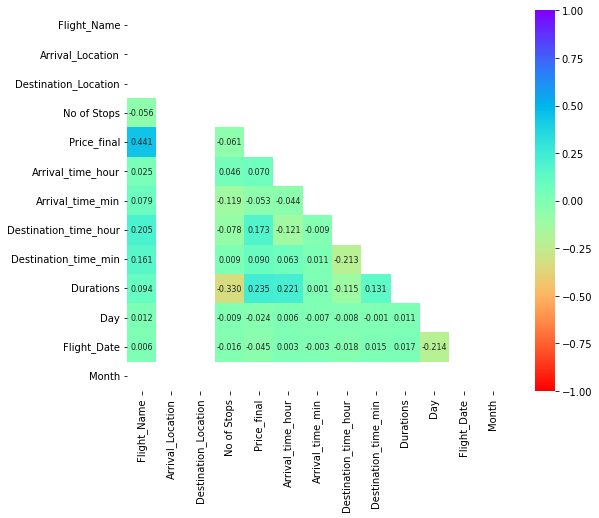

In [69]:
plt.style.use('seaborn-pastel')
upper_triangle = np.triu(df_z.corr())
plt.figure(figsize=(10,7))
sns.heatmap(df_IQR.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':8}, cmap="rainbow_r", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Variance inflation factor

In [70]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
def calc_vif(x):
    
    vif = pd.DataFrame()
    vif['Variance'] = x.columns
    vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

In [72]:
calc_vif(x)  # checking VIF of numerical columns

,Variance,VIF Factor
0,Flight_Name,3.660836
1,Arrival_Location,NaN
2,Destination_Location,NaN
3,No of Stops,1.651636
4,Arrival_time_hour,1.050076
5,Arrival_time_min,1.021233
6,Destination_time_hour,1.135503
7,Destination_time_min,1.090194
8,Durations,1.267556
9,Day,2.457676


#### There is no multicollinearity present in the dataset.

### Checking Positive and Negative Correlation

<AxesSubplot:>

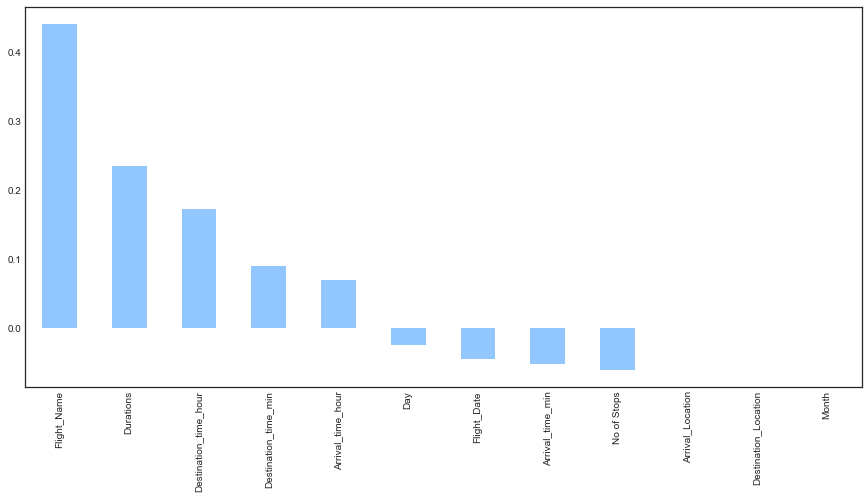

In [73]:
plt.figure(figsize = (15,7))
plt.style.use('seaborn-white')
df_IQR.corr()['Price_final'].sort_values(ascending = False).drop('Price_final').plot(kind = 'bar',)

In [74]:
df_IQR.corr()['Price_final'].sort_values(ascending = False)

Price_final              1.000000
Flight_Name              0.440807
Durations                0.234625
Destination_time_hour    0.172769
Destination_time_min     0.090227
Arrival_time_hour        0.069770
Day                     -0.024333
Flight_Date             -0.045458
Arrival_time_min        -0.053062
No of Stops             -0.061395
Arrival_Location              NaN
Destination_Location          NaN
Month                         NaN
Name: Price_final, dtype: float64

#### Day, Flight_Date, Arrival_time_min and No of Stops shows some Negative correlation while rest of dataset show positive correlation

### Feature selection using Basic Ridge Regression Model

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Ridge())
])

search = GridSearchCV(pipeline,
                      {'model__alpha':[1.0, 0.1]},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3)

search.fit(x,y)

search.best_params_

coefficients = search.best_estimator_.named_steps['model'].coef_


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ..........model__alpha=1.0;, score=-15000035.443 total time=   0.0s
[CV 2/5] END ...........model__alpha=1.0;, score=-7606307.826 total time=   0.0s
[CV 3/5] END ...........model__alpha=1.0;, score=-9507956.770 total time=   0.0s
[CV 4/5] END ...........model__alpha=1.0;, score=-8097092.257 total time=   0.0s
[CV 5/5] END ...........model__alpha=1.0;, score=-8396210.867 total time=   0.0s
[CV 1/5] END ..........model__alpha=0.1;, score=-15009327.529 total time=   0.0s
[CV 2/5] END ...........model__alpha=0.1;, score=-7607190.477 total time=   0.0s
[CV 3/5] END ...........model__alpha=0.1;, score=-9507268.314 total time=   0.0s
[CV 4/5] END ...........model__alpha=0.1;, score=-8097955.517 total time=   0.0s
[CV 5/5] END ...........model__alpha=0.1;, score=-8396686.194 total time=   0.0s


In [76]:
importance = np.abs(coefficients)

In [77]:
pd.DataFrame({'columns' : x.keys(), 'importance': importance} )

,columns,importance
0,Flight_Name,1327.859504
1,Arrival_Location,0.000000
2,Destination_Location,0.000000
3,No of Stops,132.076065
4,Arrival_time_hour,102.598490
5,Arrival_time_min,244.634047
6,Destination_time_hour,379.210534
7,Destination_time_min,80.919539
8,Durations,681.723047
9,Day,140.413713


Here we find that Month, Arrival_location and Destination feature has been discarded

In [78]:
x.drop(['Month', 'Arrival_Location','Destination_Location'], axis = 1, inplace = True)

## Checking autocorrelation

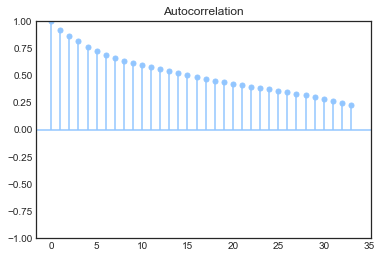

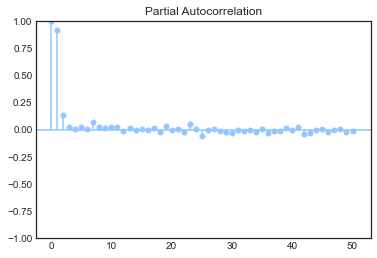

0.1656535170518208

In [79]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
  
    
  

# Plot the autocorrelation for flight price data with 0.05 significance level

plot_acf(df['Price_final'], alpha =1)
plt.show()
  
# Plot the partial autocorrelation for flight price data with 
# 0.05 significance level
plot_pacf(df['Price_final'], alpha =1, lags=50)
plt.show()
  
"""
Code for Durbin Watson test
"""
dwt = pd.DataFrame(df['Price_final'],columns=['Price_final'])
  
X_dwt =np.arange(len(dwt[['Price_final']]))
Y_dwt = np.asarray(dwt[['Price_final']])
X_dwt = sm.add_constant(X_dwt)
  
# Fit the ordinary least square method.
ols_res = OLS(Y_dwt,X_dwt).fit()
# apply durbin watson statistic on the ols residual
durbin_watson(ols_res.resid)

#### Since the d value is below 2, the Null hypothesis is not rejected. Hence First order auto correlation doesn't exist

### Principle Component Analysis

In [80]:
from sklearn.decomposition import PCA

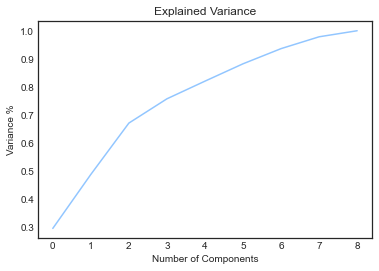

In [81]:
pca = PCA()
principleComponents = pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

#### All components explain around 95% variance in data

### Selecting Kbest Features

In [82]:
from sklearn.feature_selection import SelectKBest, f_classif

In [83]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [84]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(10,'Score'))

                 Feature      Score
0            Flight_Name  62.352685
1            No of Stops  16.237275
6              Durations   5.656271
3       Arrival_time_min   3.654755
4  Destination_time_hour   2.897377
2      Arrival_time_hour   2.781764
5   Destination_time_min   1.827663
7                    Day   1.748782
8            Flight_Date   1.474312


#### Since all the dataset show some scores hence we are not dropping anyone of them

### Model Building

In [85]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import random

### Standard Scalling

In [99]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [100]:
df_num

Index(['Price_final', 'Arrival_time_hour', 'Arrival_time_min',
       'Destination_time_hour', 'Destination_time_min', 'Durations'],
      dtype='object')

In [102]:
skewed_col = ['Arrival_time_hour','Arrival_time_min','Destination_time_hour', 'Destination_time_min', 'Durations']

In [103]:
x[skewed_col] = sc.fit_transform(x[skewed_col])  

In [104]:
x.head(1)

,Flight_Name,No of Stops,Arrival_time_hour,Arrival_time_min,Destination_time_hour,Destination_time_min,Durations,Day,Flight_Date
0,4.0,2.0,1.288095,-1.831319,1.264107,0.029012,-1.362086,6.0,0.0


### Finding the best random state

In [105]:
max_acc = 0  # maximum accuracy 
max_rs = 0  # best random state value for which max accuracy is achieved

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i, test_size = .20)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    preddt = LR.predict(x_test)
    acc = r2_score(y_test, preddt) # accuracy score
    if acc>max_acc:
        max_acc = acc
        max_rs = i
        
print('Best accuracy is', max_acc, "on random state", max_rs)

Best accuracy is 0.32820447720019763 on random state 56


In [106]:
LR=LinearRegression()
RR=Ridge(alpha=1e-2, normalize=True)
LasR=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
svr=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
DTR=DecisionTreeRegressor(criterion="poisson", random_state=111)
RFR=RandomForestRegressor(max_depth=2, max_features="sqrt")
KNR=KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
GBR=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
ABR=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
ETR=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
XGBR=XGBRegressor()
LGBR=LGBMRegressor()


models= []
models.append(('LinearRegression', LR))
models.append(('Ridge Regressor', RR))
models.append(('Lasso Regressor', LasR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('KNeighborsRegressor',KNR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('ExtraTreesRegressor',ETR))
models.append(('XGBRegressor',XGBR))
models.append(('LGBMRegressor',LGBR))

In [107]:
Model= []
score= []
cvs=[]
difference=[]
RMSE=[]

****************************************** LinearRegression ********************************************************


LinearRegression()


R2 Score is: 32.820447720019764


Cross Validation Score: 6.144070747758819


R2 Score - Cross Validation Score is 26.676376972260947
RMSE Score is: 2642.532989235545


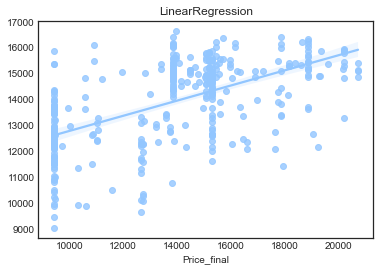

****************************************** Ridge Regressor ********************************************************


Ridge(alpha=0.01, normalize=True)


R2 Score is: 32.72345600605908


Cross Validation Score: 6.484571678221049


R2 Score - Cross Validation Score is 26.238884327838033
RMSE Score is: 2644.4399039961945


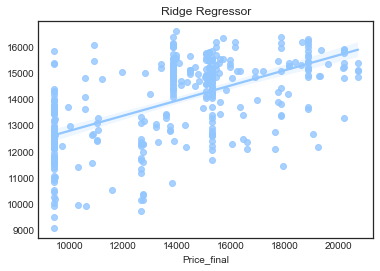

****************************************** Lasso Regressor ********************************************************


Lasso(alpha=0.01, max_iter=100000.0, normalize=True)


R2 Score is: 32.814392096405854


Cross Validation Score: 6.174358659304997


R2 Score - Cross Validation Score is 26.640033437100858
RMSE Score is: 2642.652086669441


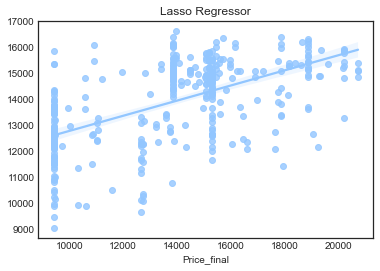

****************************************** DecisionTreeRegressor ********************************************************


DecisionTreeRegressor(criterion='poisson', random_state=111)


R2 Score is: 30.348945338907


Cross Validation Score: -101.67183190791573


R2 Score - Cross Validation Score is 132.02077724682272
RMSE Score is: 2690.7026943086616


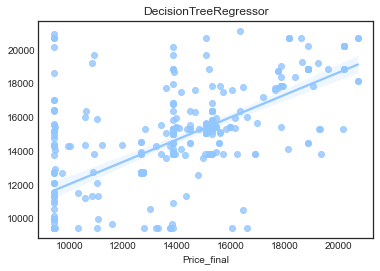

****************************************** RandomForestRegressor ********************************************************


RandomForestRegressor(max_depth=2, max_features='sqrt')


R2 Score is: 48.112342972423875


Cross Validation Score: 35.3232661126302


R2 Score - Cross Validation Score is 12.789076859793674
RMSE Score is: 2322.3832765946777


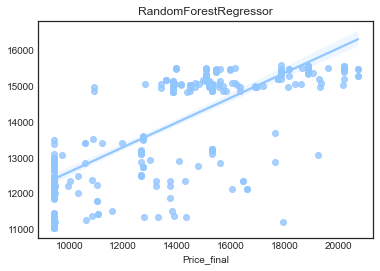

****************************************** KNeighborsRegressor ********************************************************


KNeighborsRegressor(algorithm='kd_tree', n_neighbors=2)


R2 Score is: 62.145319702506754


Cross Validation Score: -34.4776133960939


R2 Score - Cross Validation Score is 96.62293309860065
RMSE Score is: 1983.6345156300633


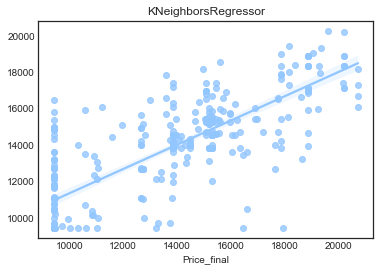

****************************************** GradientBoostingRegressor ********************************************************


GradientBoostingRegressor(loss='quantile', max_depth=5, n_estimators=200)


R2 Score is: 32.15556624306696


Cross Validation Score: -47.84605053905907


R2 Score - Cross Validation Score is 80.00161678212604
RMSE Score is: 2655.577474766057


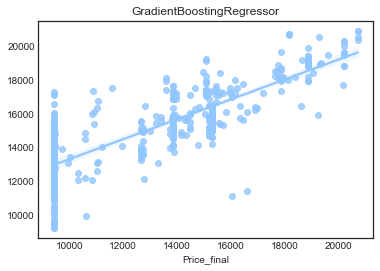

****************************************** AdaBoostRegressor ********************************************************


AdaBoostRegressor(learning_rate=1.05, n_estimators=300, random_state=42)


R2 Score is: 51.85512879747394


Cross Validation Score: 39.15913954427298


R2 Score - Cross Validation Score is 12.695989253200956
RMSE Score is: 2237.0561229680156


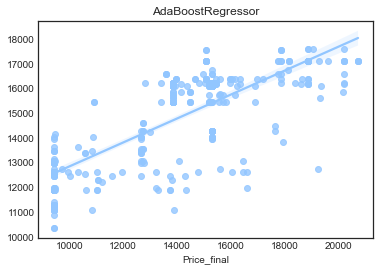

****************************************** ExtraTreesRegressor ********************************************************


ExtraTreesRegressor(max_features='sqrt', n_estimators=200, n_jobs=6)


R2 Score is: 83.55663812367638


Cross Validation Score: 47.428471963408214


R2 Score - Cross Validation Score is 36.128166160268165
RMSE Score is: 1307.3659583058957


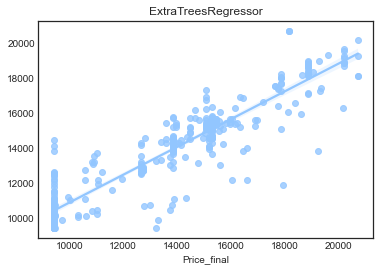

****************************************** XGBRegressor ********************************************************


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


R2 Score is: 85.57157585381393


Cross Validation Score: -0.12697645192722096


R2 Score - Cross Validation Score is 85.69855230574115
RMSE Score is: 1224.6481067914533


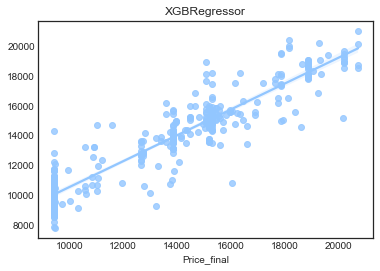

****************************************** LGBMRegressor ********************************************************


LGBMRegressor()


R2 Score is: 84.06666365102068


Cross Validation Score: 43.276592020601


R2 Score - Cross Validation Score is 40.790071630419675
RMSE Score is: 1286.9308955919028


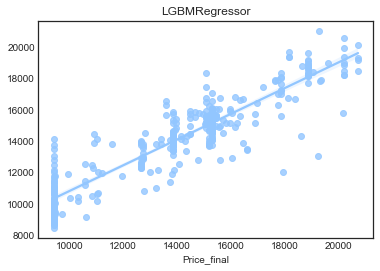

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 56, test_size = .20)

for name, model in models:
    print('******************************************',name,'********************************************************')
    
    print('\n')
    Model.append(name)
    
    # Training the model
    model.fit(x_train, y_train) #computer learing
    
    print(model)
    
     # Predicting y_test
    pred = model.predict(x_test)  #testing
    
    print('\n') 
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    score.append(r2)
    print('\n')
    
    # Cross Validation Score
    cv_score = (cross_val_score(model,x,y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    cvs.append(cv_score)
    print('\n')
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)
    difference.append(result)
    
     # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    RMSE.append(rmse)
    
    #plots created
    sns.regplot(y_test,pred)
    plt.title(name)
    plt.show()

In [110]:
result = pd.DataFrame({'Model': Model, 'r2score': score,'Cross_val_score': cvs,'RMSE score':RMSE,'Difference between cv score and cross_val score':difference})
result

,Model,r2score,Cross_val_score,RMSE score,Difference between cv score and cross_val score
0,LinearRegression,32.820448,6.144071,2642.532989,26.676377
1,Ridge Regressor,32.723456,6.484572,2644.439904,26.238884
2,Lasso Regressor,32.814392,6.174359,2642.652087,26.640033
3,DecisionTreeRegressor,30.348945,-101.671832,2690.702694,132.020777
4,RandomForestRegressor,48.112343,35.323266,2322.383277,12.789077
5,KNeighborsRegressor,62.145320,-34.477613,1983.634516,96.622933
6,GradientBoostingRegressor,32.155566,-47.846051,2655.577475,80.001617
7,AdaBoostRegressor,51.855129,39.159140,2237.056123,12.695989
8,ExtraTreesRegressor,83.556638,47.428472,1307.365958,36.128166
9,XGBRegressor,85.571576,-0.126976,1224.648107,85.698552


#### We are selecting LGBM regressor as it gives less RMSE score with good R2 score rather than other models

### Ensemble Method 

## Hyper Parameter Tuning

In [111]:
model = LGBMRegressor()
# using hyper parameter tuning for Ridge regression to find out best criterion

# param (boosting_type: str = 'gbdt',
#     num_leaves: int = 31,
#     max_depth: int = -1,
#     learning_rate: float = 0.1,
#     n_estimators: int = 100,
#     subsample_for_bin: int = 200000,
#     objective: Union[str, Callable, NoneType] = None,
#     class_weight: Union[Dict, str, NoneType] = None,
#     min_split_gain: float = 0.0,
#     min_child_weight: float = 0.001,
#     min_child_samples: int = 20,
#     subsample: float = 1.0,
#     subsample_freq: int = 0,
#     colsample_bytree: float = 1.0,
#     reg_alpha: float = 0.0,
#     reg_lambda: float = 0.0,
#     random_state: Union[numpy.random.mtrand.RandomState, int, NoneType] = None,
#     n_jobs: int = -1,
#     silent: Union[bool, str] = 'warn',
#     importance_type: str = 'split',)
# by default params

param = {'boosting_type': ['gbdt', 'dart'], 'num_leaves': [31,41], 'max_depth': [-1,0], 'learning_rate': [0.1, 1],
        'n_estimators': [100], 'colsample_bytree': [1.0, 0.1],}
# using only important parameters.

gd = GridSearchCV(model, param_grid=param, cv = 8)
gd.fit(x, y)
gd.best_params_

# {'boosting_type': 'dart',
#  'colsample_bytree': 1.0,
#  'learning_rate': 1,
#  'max_depth': -1,
#  'n_estimators': 100,
#  'num_leaves': 41}

{'boosting_type': 'dart',
 'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': -1,
 'n_estimators': 100,
 'num_leaves': 41}

In [113]:
final_model = LGBMRegressor(boosting_type = 'dart', colsample_bytree= 1.0, learning_rate= 0.1, max_depth = -1, n_estimators=100, num_leaves = 41)

In [117]:
#final_model = LGBMRegressor()

At random state 56 model giving best accuracy score 

Training accuracy:-  43.98358076622812
Testing accuracy:-  42.14709638083677


--------------------------------------
Mean squared error:-  3880996.6486919206
Mean absolute error:-  1519.8785421946864
Root Mean squared error:- 1970.0245299721323


Text(0.5, 1.0, 'LGBMRegressor()')

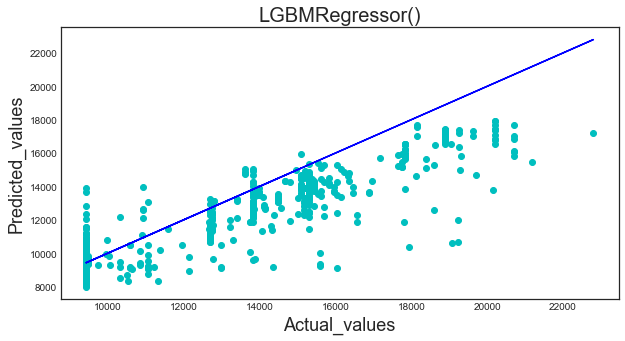

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 56)
final_model.fit(x_train, y_train)
pred_train = final_model.predict(x_train)
pred_test = final_model.predict(x_test)
print("At random state", 56 , "model giving best accuracy score","\n")
Train_accuracy = r2_score(pred_train, y_train)
Test_accuracy = r2_score(pred_test, y_test)

print('Training accuracy:- ', Train_accuracy*100)
print('Testing accuracy:- ', Test_accuracy*100)
print("\n")
print('--------------------------------------')
print('Mean squared error:- ', mean_squared_error(pred_test, y_test) )
print('Mean absolute error:- ', mean_absolute_error(pred_test, y_test) )
print('Root Mean squared error:-',np.sqrt(mean_squared_error(pred_test, y_test)))
        
plt.figure(figsize = (10, 5))
plt.scatter(x = y_test, y = pred_test, color = 'c')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual_values', fontsize= 18 )
plt.ylabel('Predicted_values', fontsize = 18)
plt.title(str(model), fontsize = 20)

### 

### Cross Val Score

In [116]:
cross_val_score(final_model, x, y, cv = 5).mean()

0.45812222439448663

### Deploy Model

In [118]:
import pickle

filename = "Flight.pkl"
pickle.dump(final_model, open(filename, 'wb'))

### Loading Model

In [119]:
load = pickle.load(open('Flight.pkl', 'rb'))
result = load.score(x_test, y_test)
print(result)

0.6303105255246516


In [120]:
conclusion = pd.DataFrame()
conclusion['Predicted Flight price'] = np.array(final_model.predict(x_test))
conclusion['Actual Flight price'] = np.array(y_test)

In [121]:
conclusion.sample(10)

,Predicted Flight price,Actual Flight price
337,16795.186005,20209.0
46,9136.172583,9419.0
534,8713.313683,9419.0
467,9691.564778,9419.0
436,13634.462069,15300.0
73,9466.919404,9419.0
430,8421.562006,9419.0
3,13873.456925,15193.0
391,13664.307584,15296.0
21,13764.046146,15432.0
